<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df = df.drop('Unnamed: 32', axis = 1)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [9]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [10]:
# ANSWER
y = df['diagnosis']

### 4. What is the baseline accuracy?

<AxesSubplot:ylabel='diagnosis'>

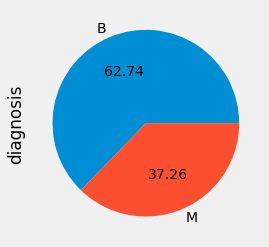

In [11]:
# ANSWER
y.value_counts().plot.pie(autopct = '%.2f')

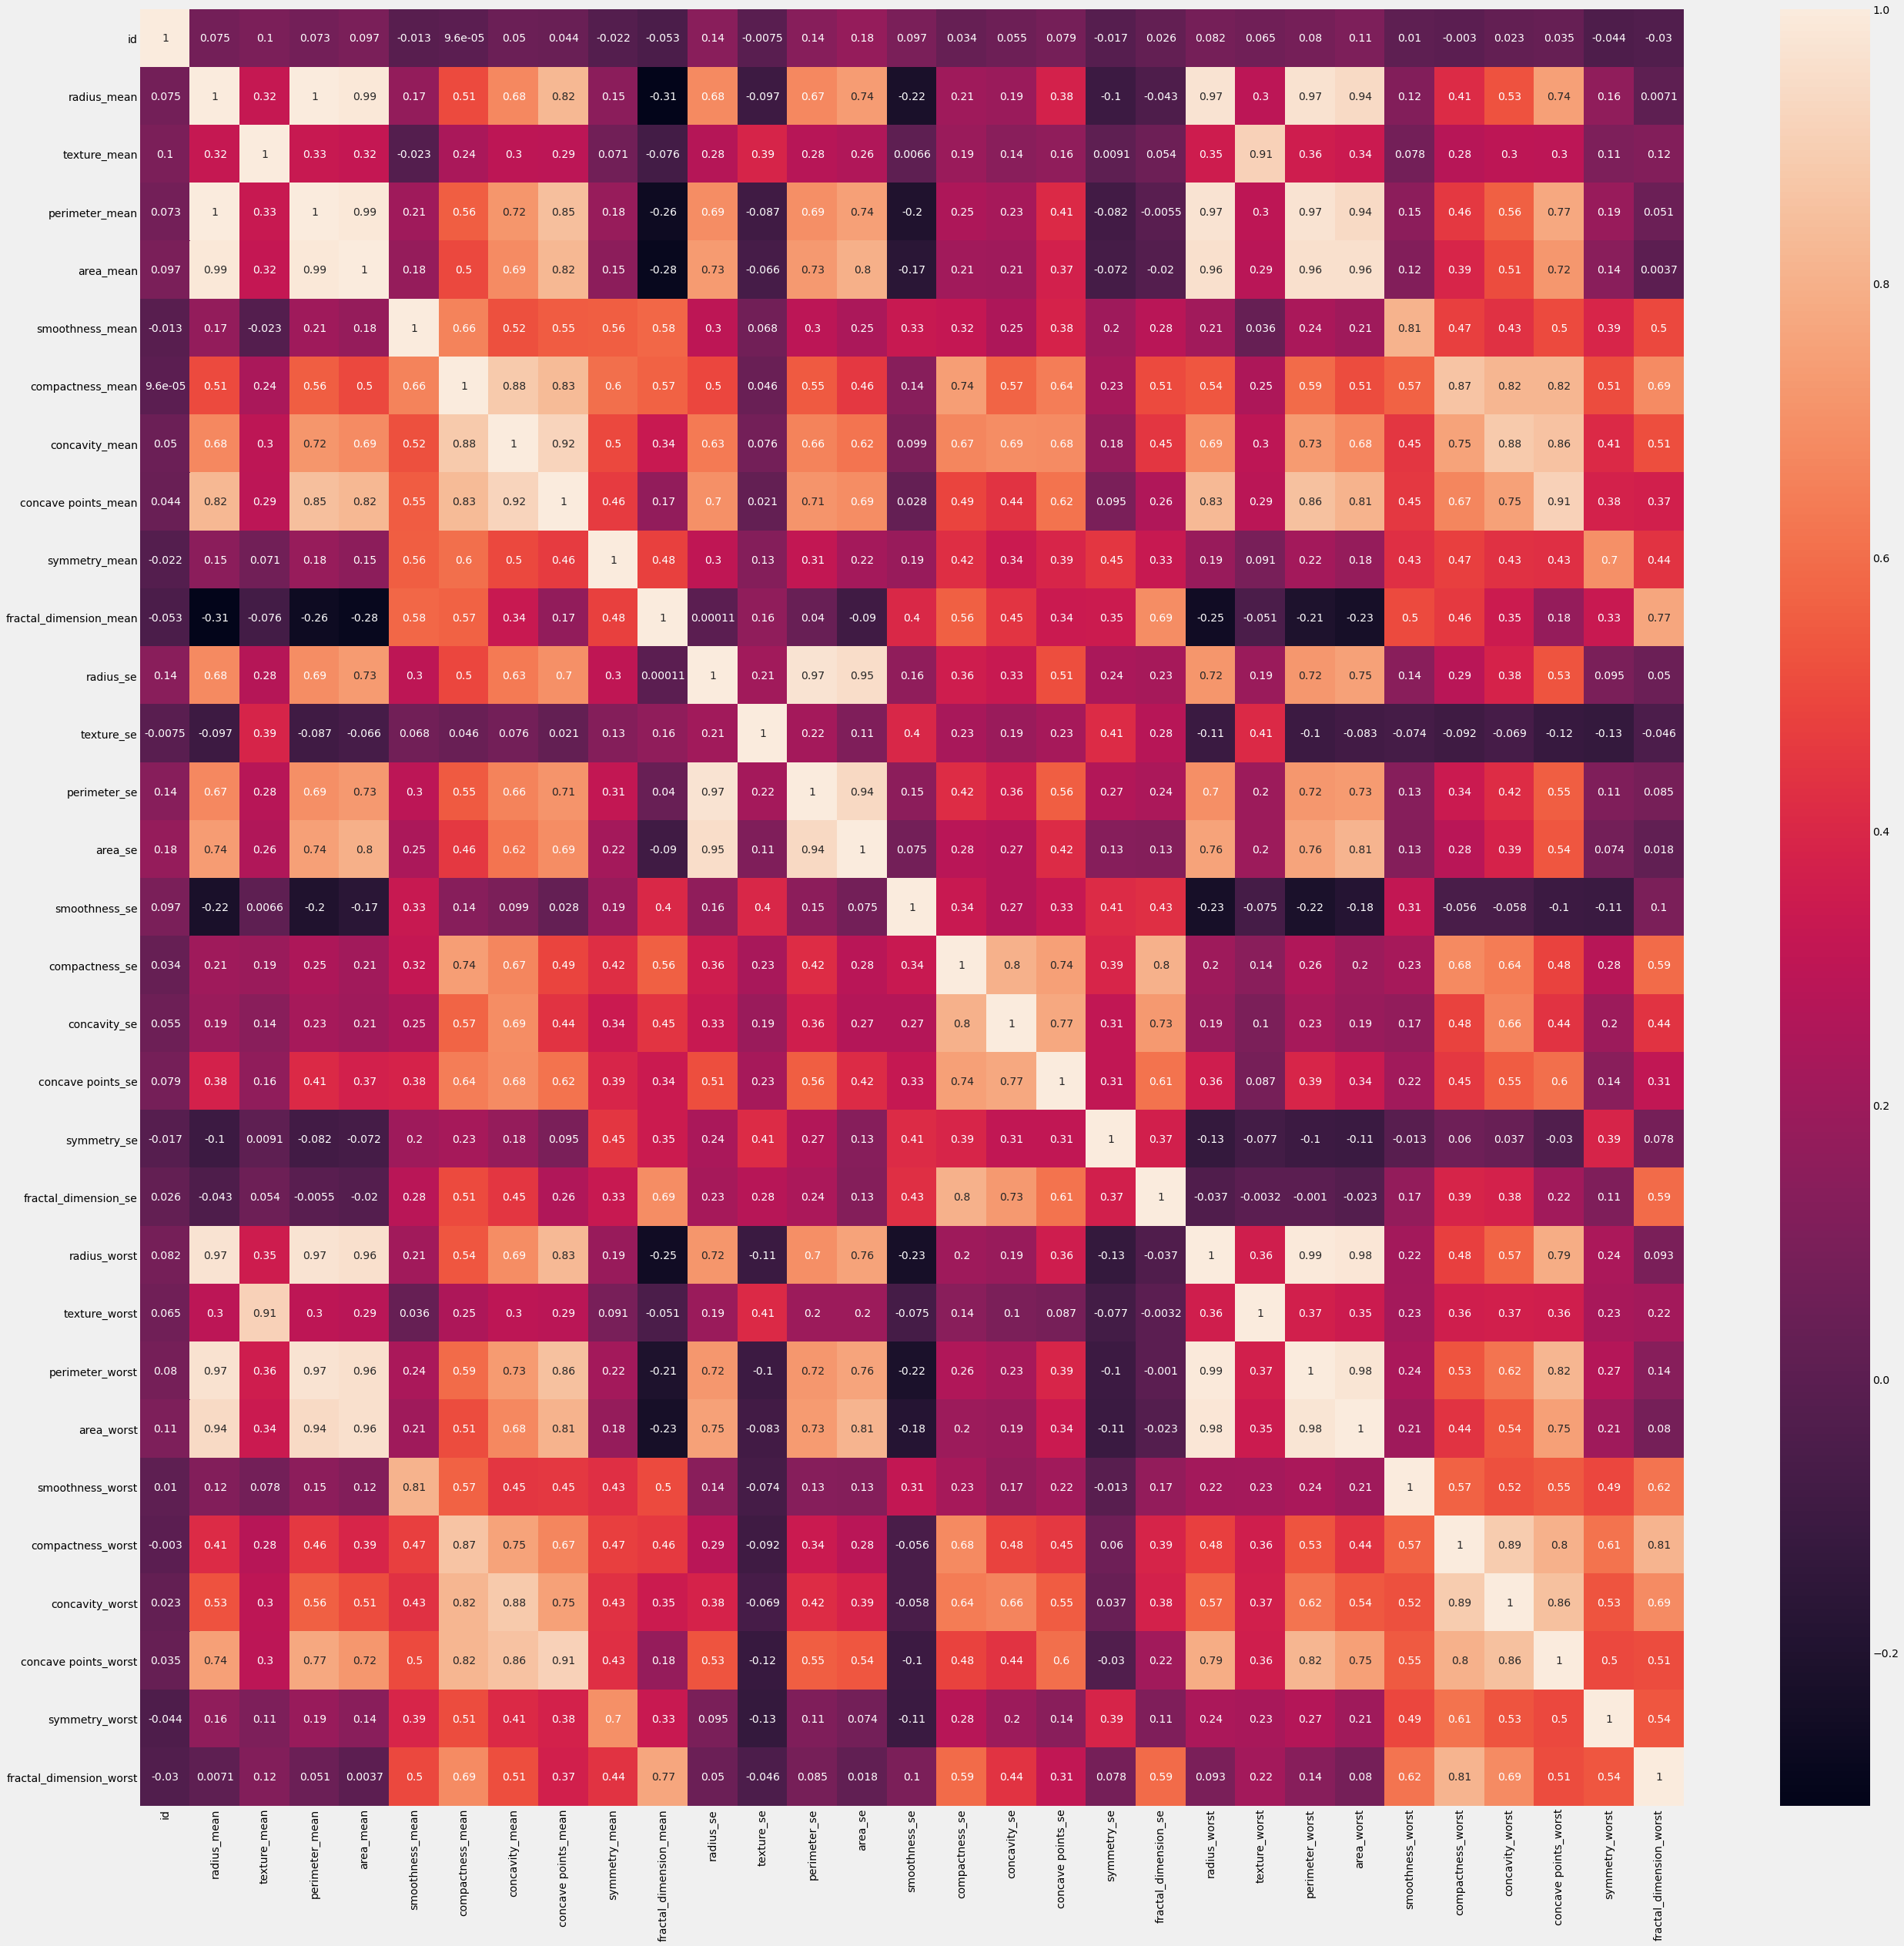

In [12]:
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot = True)
plt.show()

### 5. Choose features to be your predictor variables and set up your X.

In [13]:
# ANSWER
def forward_selection(model, X_train, X_test, y_train, y_test, show_steps = False):
    ## Use Forward Feature Selection to pick a good model

    # start with no predictors
    included = []
    # keep track of model and parameters
    best = {'feature': '', 'accuracy': 0}
    # create a model object to hold the modelling parameters
    # create a model for Linear Regression
    # get the number of cases in the test data
    n = X_test.shape[0]

    while True:
        changed = False

        if show_steps:
            print('') 

        # list the features to be evaluated
        excluded = list(set(X.columns) - set(included))

        if show_steps:
            print('(Step) Excluded = %s' % ', '.join(excluded))  

        # for each remaining feature to be evaluated
        for new_column in excluded:

            if show_steps:
                print('(Step) Trying %s...' % new_column)
                print('(Step) - Features = %s' % ', '.join(included + [new_column]))

            # fit the model with the Training data
            fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
            # calculate the score (R^2 for Regression)
            accuracy = model.score(X_train[included + [new_column]], y_train) # calculate the score

            if show_steps:
                print('(Step) - Accuracy: This = %.3f; Best = %.3f' % 
                      (accuracy, best['accuracy']))

            # if model improves
            if accuracy > best['accuracy']:
                # record new parameters
                best = {'feature': new_column, 'accuracy': accuracy}
                # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; Accuracy = %.3f' % 
                          (best['feature'], best['accuracy']))
        # END for

        # if found a better model after testing all remaining features
        if changed:
            # update control details
            included.append(best['feature'])
            excluded = list(set(excluded) - set(best['feature']))
            print('Added feature %-4s with Accuracy = %.3f' % 
                  (best['feature'], best['accuracy']))
        else:
            # terminate if no better model
            break

    print('')
    print('Resulting features:')
    print(', '.join(included))

In [14]:
feature_columns = [c for c in df.columns if c != 'diagnosis']
X = df[feature_columns]

In [15]:
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y)
forward_selection(knn, X_train, X_test, y_train, y_test, False)

Added feature radius_worst with Accuracy = 0.934
Added feature texture_mean with Accuracy = 0.955
Added feature texture_se with Accuracy = 0.962

Resulting features:
radius_worst, texture_mean, texture_se


In [16]:
X = df[['perimeter_worst', 'texture_worst', 'perimeter_mean' , 'texture_mean']]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [17]:
# ANSWER
from sklearn.neighbors import KNeighborsClassifier
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)
# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [18]:
# ANSWER
# predict the response values for the observations in X ("test the model")
y_pred_class = knn.predict(X)
# store the predicted response values
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [19]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# STEP 2: train the model on the training set (using K=1)
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

1.0


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [20]:
X_train.shape[0]

455

In [21]:
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn3 = KNeighborsClassifier(n_neighbors = X_train.shape[0])

# Fit Train Data
knn3.fit(X_train,y_train)

# Print accuracy_score
accuracy_score = knn3.score(X_test,y_test)
print(accuracy_score)

0.6228070175438597


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [22]:
np.floor(X.shape[0] - X.shape[0]/5.)

455.0

In [23]:
# ANSWER
# plot test accuracy by number of neighbors:
test_acc = []
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

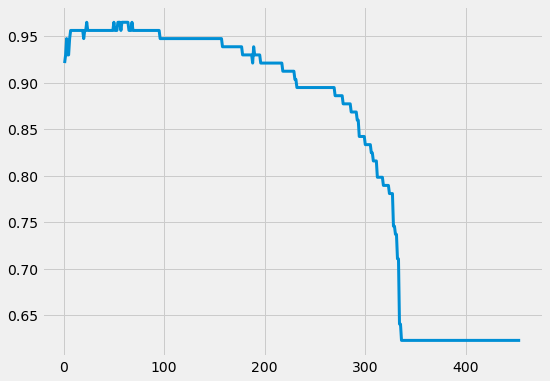

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [25]:
# ANSWER
from sklearn.model_selection import cross_val_score
folds = 5

# plot test accuracy by number of neighbors:
test_acc_cv = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_cv.append(np.mean(cross_val_score(knn, X, y, cv=folds)))
    
print(max(test_acc_cv))

0.9455519329296692


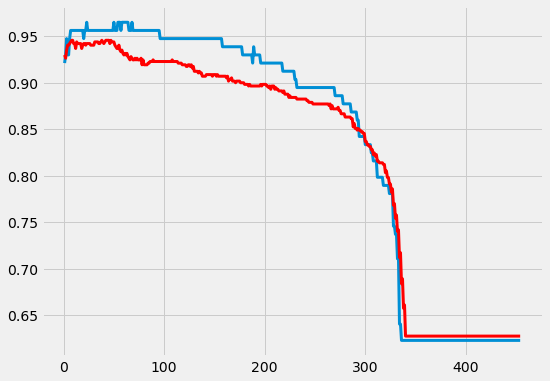

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_cv, lw=3., color='red')
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [27]:
# ANSWER
# Standarize X
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[ 2.30360062, -1.35929347,  1.26993369, -2.07333501],
       [ 1.53512599, -0.36920322,  1.68595471, -0.35363241],
       [ 1.34747521, -0.02397438,  1.56650313,  0.45618695],
       ...,
       [ 0.57900058,  1.37485378,  0.67267578,  2.0455738 ],
       [ 2.30360062,  2.23792588,  1.98252415,  2.33645719],
       [-1.43273495,  0.76418957, -1.81438851,  1.22179204]])

In [28]:
# ANSWER
# plot test accuracy by number of neighbors:
test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, X_std, y, cv=folds)))

print(max(test_acc_std))

0.9402887750349324


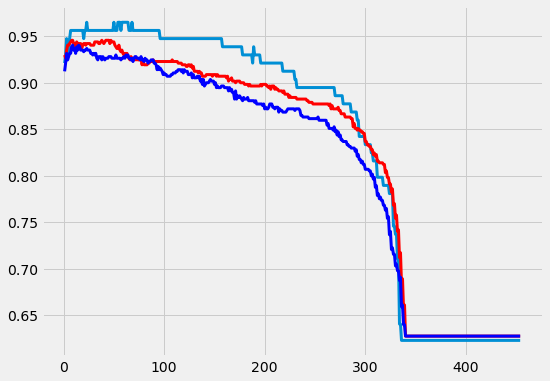

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_cv, lw=3., color='red')
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='b')
plt.show()


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



